# 1.Thu thập dữ liệu
What subject is your data about? What is the source of
your data?
• Do authors of this data allow you to use like this? You
can check the data license
• How did authors collect data?

# 2.Khám phá và tiền xử lí

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
results_df=pd.read_csv('results.csv')

In [3]:
results_df

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14 00:00:00,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14 00:00:00,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14 00:00:00,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14 00:00:00,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14 00:00:00,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,2019-20,2020-07-26 16:00:00,Leicester,Man United,0,2,A,0.0,0.0,D,...,3.0,3.0,3.0,3.0,12.0,11.0,1.0,4.0,1.0,0.0
10420,2019-20,2020-07-26 16:00:00,Man City,Norwich,5,0,H,2.0,0.0,H,...,10.0,4.0,9.0,0.0,7.0,4.0,1.0,1.0,0.0,0.0
10421,2019-20,2020-07-26 16:00:00,Newcastle,Liverpool,1,3,A,1.0,1.0,D,...,2.0,6.0,2.0,4.0,11.0,5.0,1.0,0.0,0.0,0.0
10422,2019-20,2020-07-26 16:00:00,Southampton,Sheffield United,3,1,H,0.0,1.0,A,...,4.0,3.0,9.0,1.0,9.0,16.0,0.0,1.0,0.0,0.0


- FTHG: Full Time Home Team Goals
- FTAG: Full Time Away Team Goals
- FTR: Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG: Half Time Home Team Goals
- HTAG: Half Time Away Team Goals
- HTR: Half Time Result (H=Home Win, D=Draw, A=Away Win)
- Referee: Match Referee
- HS: Home Team Shots
- AS: Away Team Shots
- HST: Home Team Shots on Target
- AST: Away Team Shots on Target
- HC: Home Team Corners
- AC: Away Team Corners
- HF: Home Team Fouls Committed
- AF: Away Team Fouls Committed
- HY: Home Team Yellow Cards
- AY: Away Team Yellow Cards
- HR: Home Team Red Cards
- AR: Away Team Red Cards

## Khám phá dữ liệu 

#### Số dòng, số cột

In [4]:
num_rows, num_cols = results_df.shape
print(f'Rows: {num_rows} \nCols: {num_cols}')

Rows: 10424 
Cols: 23


#### Kiểm tra trùng lặp

In [5]:
duplicate = results_df.duplicated()
duplicate[duplicate == True]

Series([], dtype: bool)

- Dữ liệu không có dòng trùng lặp

#### Kiểu dữ liệu của từng cột

In [6]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10424 entries, 0 to 10423
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10424 non-null  object 
 1   Date      10424 non-null  object 
 2   HomeTeam  10424 non-null  object 
 3   AwayTeam  10424 non-null  object 
 4   FTHG      10424 non-null  int64  
 5   FTAG      10424 non-null  int64  
 6   FTR       10424 non-null  object 
 7   HTHG      9500 non-null   float64
 8   HTAG      9500 non-null   float64
 9   HTR       9500 non-null   object 
 10  Referee   7600 non-null   object 
 11  HS        7600 non-null   float64
 12  AS        7600 non-null   float64
 13  HST       7600 non-null   float64
 14  AST       7600 non-null   float64
 15  HC        7600 non-null   float64
 16  AC        7600 non-null   float64
 17  HF        7600 non-null   float64
 18  AF        7600 non-null   float64
 19  HY        7600 non-null   float64
 20  AY        7600 non-null   fl

### Với mỗi cột có kiểu dữ liệu dạng numberic, các giá trị được phân bố như thế nào? 

- các cột datetime sẽ vào nhóm numberic.Có 17 cột thuộc nhóm numberic **Date,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR**. Tính tỉ lệ giá trị thiếu,**min** và **max**	

In [7]:
missing_scale = round(results_df[['Date','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']]\
                            .isnull().sum()*100/len(results_df),2)

Min = results_df[['Date','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']].min()
Max = results_df[['Date','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']].max()
nume_col_profiles_df = pd.DataFrame([missing_scale,Min,Max],columns=['Date','FTHG','FTAG','HTHG','HTAG','HS','AS','HST'\
                                                                     ,'AST','HC','AC','HF','AF','HY','AY','HR','AR'],\
                                    index=['missing_scale', 'min','max'])

In [8]:
nume_col_profiles_df

,Date,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
missing_scale,0.0,0.0,0.0,8.86,8.86,27.09,27.09,27.09,27.09,27.09,27.09,27.09,27.09,27.09,27.09,27.09,27.09
min,1993-08-14 00:00:00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,2020-07-26 16:00:00,9.0,9.0,5.00,5.00,43.00,30.00,24.00,20.00,20.00,19.00,33.00,29.00,7.00,9.00,3.00,2.00


- missing_scale của các cột HTHG HTAG HS AS HST AST HC AC HF AF HY AY HR AR có bất thường bởi vì có tỉ lệ giá trí thiết khá cao.

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào? 

- Có 6 cột thuộc nhóm categorical **Season,HomeTeam,AwayTeam,FTR,HTR,Referee**.Với mỗi cột categorical,tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu). Bạn lưu kết quả vào dataframe `cate_col`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals"; và có 6 cột **Season,HomeTeam,AwayTeam,FTR,HTR,Referee**

In [9]:
missing_scale = results_df[['Season','HomeTeam','AwayTeam','FTR','HTR','Referee']].\
                isnull().sum()*100/len(results_df)

different_values=results_df[['Season','HomeTeam','AwayTeam','FTR','HTR','Referee']].nunique()

In [10]:
cate_col = pd.DataFrame([missing_scale,different_values],\
                                    columns=['Season','HomeTeam','AwayTeam','FTR','HTR','Referee'],\
                                    index=['missing_scale','num_diff_vals'])
cate_col

,Season,HomeTeam,AwayTeam,FTR,HTR,Referee
missing_scale,0.0,0.0,0.0,0.0,8.86416,27.091328
num_diff_vals,27.0,49.0,49.0,3.0,3.00000,169.000000


- missing_scale của hai cột HTR và Referee có bất thường bởi vì có tỉ lệ giá trí thiếu khá cao.

In [11]:
season=results_df['Season'].dropna().unique()
hometeam=results_df['HomeTeam'].dropna().unique()
awayteam=results_df['AwayTeam'].dropna().unique()
fullTime=results_df['FTR'].dropna().unique()
haft=results_df['HTR'].dropna().unique()
referee=results_df['Referee'].dropna().unique()

different_values=pd.Series([season,hometeam,awayteam,fullTime,haft,referee],\
                    index=['Season','HomeTeam','AwayTeam','FTR','HTR','Referee'])
different_values

Season      [1993-94, 1994-95, 1995-96, 1996-97, 1997-98, ...
HomeTeam    [Arsenal, Aston Villa, Chelsea, Liverpool, Man...
AwayTeam    [Coventry, QPR, Blackburn, Sheffield Weds, Lee...
FTR                                                 [A, H, D]
HTR                                                 [H, D, A]
Referee     [Rob Harris, Graham Barber, Barry Knight, Andy...
dtype: object

## Tiền xử lí dữ liệu

- Chuyển cột Date sang datetime

In [12]:
results_df['Date'] = pd.to_datetime(results_df['Date'] , format ='%Y-%m-%d')

- Việc khám phá dữ liệu ta thấy là các cột HTHG	HTAG	HS	AS	HST	AST	HC	AC	HF	AF	HY	AY	HR	AR và HTR Referee có tỉ lệ giá trị thiếu khá cao

In [13]:
results_df[results_df.isnull().any(axis=1)]

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,1999-00,2000-05-14,Sheffield Weds,Leicester,4,0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2820,1999-00,2000-05-14,Southampton,Wimbledon,2,0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,1999-00,2000-05-14,Tottenham,Sunderland,3,1,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2822,1999-00,2000-05-14,Watford,Coventry,1,0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
results_df[results_df.index>2824]

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2825,2000-01,2000-08-19 00:00:00,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000-01,2000-08-19 00:00:00,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000-01,2000-08-19 00:00:00,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000-01,2000-08-19 00:00:00,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
2829,2000-01,2000-08-19 00:00:00,Leicester,Aston Villa,0,0,D,0.0,0.0,D,...,4.0,3.0,5.0,4.0,12.0,12.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,2019-20,2020-07-26 16:00:00,Leicester,Man United,0,2,A,0.0,0.0,D,...,3.0,3.0,3.0,3.0,12.0,11.0,1.0,4.0,1.0,0.0
10420,2019-20,2020-07-26 16:00:00,Man City,Norwich,5,0,H,2.0,0.0,H,...,10.0,4.0,9.0,0.0,7.0,4.0,1.0,1.0,0.0,0.0
10421,2019-20,2020-07-26 16:00:00,Newcastle,Liverpool,1,3,A,1.0,1.0,D,...,2.0,6.0,2.0,4.0,11.0,5.0,1.0,0.0,0.0,0.0
10422,2019-20,2020-07-26 16:00:00,Southampton,Sheffield United,3,1,H,0.0,1.0,A,...,4.0,3.0,9.0,1.0,9.0,16.0,0.0,1.0,0.0,0.0


In [15]:
results_df.isnull().sum(axis=1).unique()

array([16, 13,  0], dtype=int64)

- Các cột HTHG HTAG HS AS HST AST HC AC HF AF HY AY HR AR và HTR Referee có tỉ lệ giá trị thiếu khá cao từ năm mùa giải năm 1993-94 tới mùa giải 1999-00 vì thế chúng ta sẽ bắt đầu khám phá dữ liệu từ năm 2000

In [16]:
results_df=results_df.dropna(thresh=12)

In [17]:
results_df=results_df.reset_index()

## Khám phá dữ liệu (tiếp tục)

- Có bao nhiêu mùa giải.Mỗi mùa có bao nhiêu đội bóng, tổng số trận của mỗi mùa.Kết lưu vào datafame **info_season** có 3 cột **'Season','Total team per season','Total match'**

In [18]:
totalTeam=results_df.groupby('Season')['HomeTeam'].nunique().to_frame()
totalTeam=totalTeam.reset_index()
totalTeam=totalTeam.rename(columns={'HomeTeam':'Total team per season'})

In [19]:
totalMatch=results_df['Season'].value_counts().to_frame()
totalMatch.columns=['Total match']
totalMatch=totalMatch.reset_index()
totalMatch=totalMatch.rename(columns={'index':'Season'})


In [20]:
info_season = pd.merge(totalTeam,totalMatch)
info_season

,Season,Total team per season,Total match
0,2000-01,20,380
1,2001-02,20,380
2,2002-03,20,380
3,2003-04,20,380
4,2004-05,20,380
5,2005-06,20,380
6,2006-07,20,380
7,2007-08,20,380
8,2008-09,20,380
9,2009-10,20,380


- Không có gì bất thường

# 3.Đặt vấn đề và tìm câu trả lời

1. Những yếu tố nào làm ảnh hưởng đền tỉ lệ chiến thắng của một đội bóng ? Tìm câu trả lời cho câu hỏi này nhằm dự đoán được đội nào có khả năng giành chiến thắng cao hơn trong một trận đấu 1     
 

2. Số lần phạm lỗi của đội nhà và đội khách như nào ở mỗi mùa giải ? Tìm câu trả lời cho câu hỏi này nhằm giúp các cầu thủ và huấn luyện viên dè chừng với các đội nhà hay đội khách thường có lỗi đá rắn hay phạm lỗi. 

3. Số bàn thắng tương ứng như thế nào với số trận thắng của các đội trong mùa giải 3 mùa giải gần đây nhất ? Từ đó rút ra được điều gì ?
- Mục tiêu: Thống kê được xếp hạng của các đội, tổng số bàn thắng của cả lượt đi và lượt về. Từ đó đánh giá số trận thắng của các đội và số bàn thắng có mối quan hệ như thế nào.

4. Những yếu tố nào giúp một đội bóng giành chức vô địch trong một mùa giải ? Tìm câu trả lời cho câu hoi này nhằm để các đội bóng đưa ra các kế hoạch, mục tiêu để đạt được để vô địch (chiến thuật,...) 

# 4.Phân tích dữ liệu để trả lời cho các câu hỏi 

A. Dựa vào cột 'FTR' ta tính lần lượt mỗi mùa có có báo nhiêu trận thắng với giá trị tương ứng là 'H' sau đó lấy tổng số lượng chia cho 380 (mỗi mùa giải có 380 trận đấu), làm lần lượt tương tự với giá trị 'D'(draw),'A'(away win). Kết quả lưu vào Dataframe với index là 20 mùa giải, với 3 cột **'Home win'** **'Draw'** **'Home Loss'**

In [21]:
homeWin=((results_df.loc[results_df['FTR']=='H'].groupby('Season')['FTR'].count()/380)*100).to_frame()
draw=((results_df.loc[results_df['FTR']=='D'].groupby('Season')['FTR'].count()/380)*100).to_frame()
homeLose=((results_df.loc[results_df['FTR']=='A'].groupby('Season')['FTR'].count()/380)*100).to_frame()
homeWin=homeWin.rename(columns={'FTR': 'Home win'})
homeWin['Draw']=draw.values
homeWin['Home Loss']=homeLose.values
home_scale=homeWin

- Từ kết quả có được vẽ biểu đồ bar char, với trục hoành là mỗi mùa giải, trục tung phần trăm (theo đơn vị %, nghĩa là có giá trị từ 0-100)

In [22]:
plt.style.use('fivethirtyeight') 

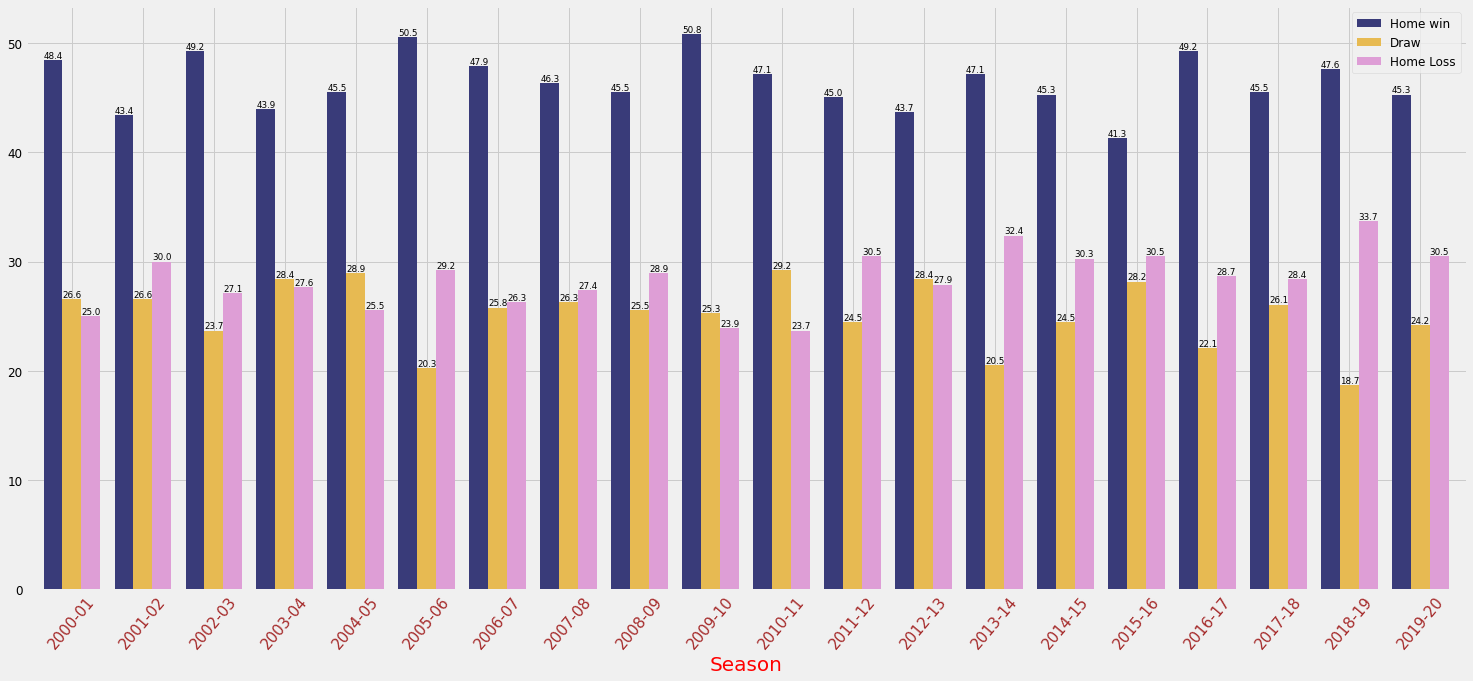

In [23]:
ax=home_scale.plot.bar(align='center',width=0.8,fontsize=12,figsize=(23,10),colormap='tab20b')
plt.xticks(rotation=50,color='brown',fontsize=15)
plt.xlabel('Season', fontsize=20,color='red')
plt.legend(fontsize=12)
for p in ax.containers:
    ax.bar_label(p, fmt='%.1f', label_type='edge',fontsize=8.7)
plt.show()


- Ta thấy tỉ lệ số trận thắng khi các đội thi đấu ở sân nhà chiếm gần 50% mỗi mùa. Tại sao lại như vậy?<br/> Câu trả lời sẽ có sau các phần phân tích phía dưới  <br/> **Tiếp tục phân tích**  <br/> 

<!-- Trong giải bóng đá ngoại hạng Anh khi thi đấu trên sân nhà các đội sẽ có các lợi thế sau:<br/> 
  1. Ở giải ngoại hạng Anh, số lượng khán giả đội nhà luôn áp đảo đội khách
  2. Quen thuộc với đặc điểm của sân, tác động thời thiết
  3. Tâm lý của các cầu thủ -->
  


### Tiếp tục phân tích
B. Tỉ lệ dứt điểm chính xác so với số lần dứt điểm của đội khách và đội nhà mỗi mùa <br>
C. Tỉ lệ dứt điểm thành bàn so với số lần dứt điểm chính xác của đội khách và đội nhà mỗi mùa 

- Tính tổng số lần dứt điểm của đội nhà cột **HS**,số lần dứt điểm chính xác cột **HST**,dứt điểm thành bàn cột **FTHG**

In [24]:
homeShot=results_df.groupby('Season')['HS'].sum()
homeShotTarget=results_df.groupby('Season')['HST'].sum()
homeGoal=results_df.groupby('Season')['FTHG'].sum()

- Tính tổng số lần dứt điểm của đội khác cột **AS**,số lần dứt điểm chính xác cột **AST**,dứt điểm thành bàn cột **FTAG**

In [25]:
awayShot=results_df.groupby('Season')['AS'].sum()
awayShotTarget=results_df.groupby('Season')['AST'].sum()
awayGoal=results_df.groupby('Season')['FTAG'].sum()

#### B. Tỉ lệ dứt điểm chính xác so với số lần dứt điểm của đội khách và đội nhà mỗi mùa
   - Lấy số lần dứt điểm chính xác/số lần dứt điểm (theo đơn vị %, nghĩa là có giá trị từ 0-100). Kết quả lưu vào Dataframe **shot_target_scale**

In [26]:
homeShotTarget_scale=(homeShotTarget/homeShot)*100
homeShotTarget_scale.name='HomeShotTarget_scale'

awayShotTarget_scale=(awayShotTarget/awayShot)*100
awayShotTarget_scale.name='AwayShotTarget_scale'
shot_target_scale = pd.concat([homeShotTarget_scale, awayShotTarget_scale], axis=1)

- Lấy kết quả thu được vẽ biểu đồ cột nằm ngang

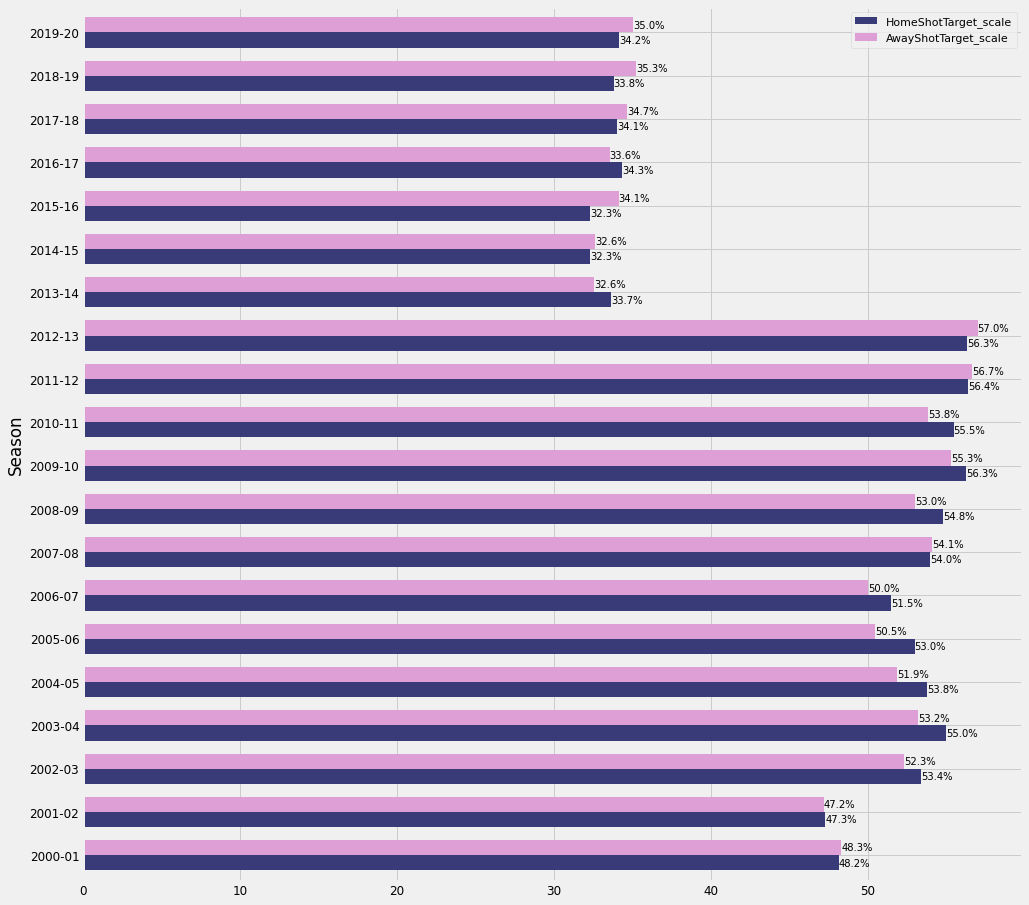

In [27]:
ax=shot_target_scale.plot(kind='barh',align='center',width=0.7,fontsize=12,figsize=(15,15),colormap='tab20b')
plt.legend(fontsize=11)
for p in ax.containers:
    ax.bar_label(p, fmt='%.1f%%', label_type='edge',fontsize=10)

- Nhận xét B: Tỉ lệ dứt điểm chính xác so với số lần dứt điểm của đội khách và đội nhà mỗi mùa là khá tương đương nhau, không chêch lệch quá nhiều

#### C. Tỉ lệ dứt điểm thành bàn so với số lần dứt điểm chính xác của đội khách và đội nhà mỗi mùa 
   - Lấy số lần dứt điểm thành bàn/số lần dứt điểm chính xác (theo đơn vị %, nghĩa là có giá trị từ 0-100). Kết quả lưu vào Dataframe **goal_scale** 

In [28]:
homeGoal_scale=(homeGoal/homeShotTarget)*100
homeGoal_scale.name='HomeGoal_scale'

awayGoal_scale=(awayGoal/awayShotTarget)*100
awayGoal_scale.name='AwayGoal_scale'
goal_scale = pd.concat([homeGoal_scale, awayGoal_scale], axis=1)

- Lấy kết quả thu được vẽ biểu đồ cột nằm ngang

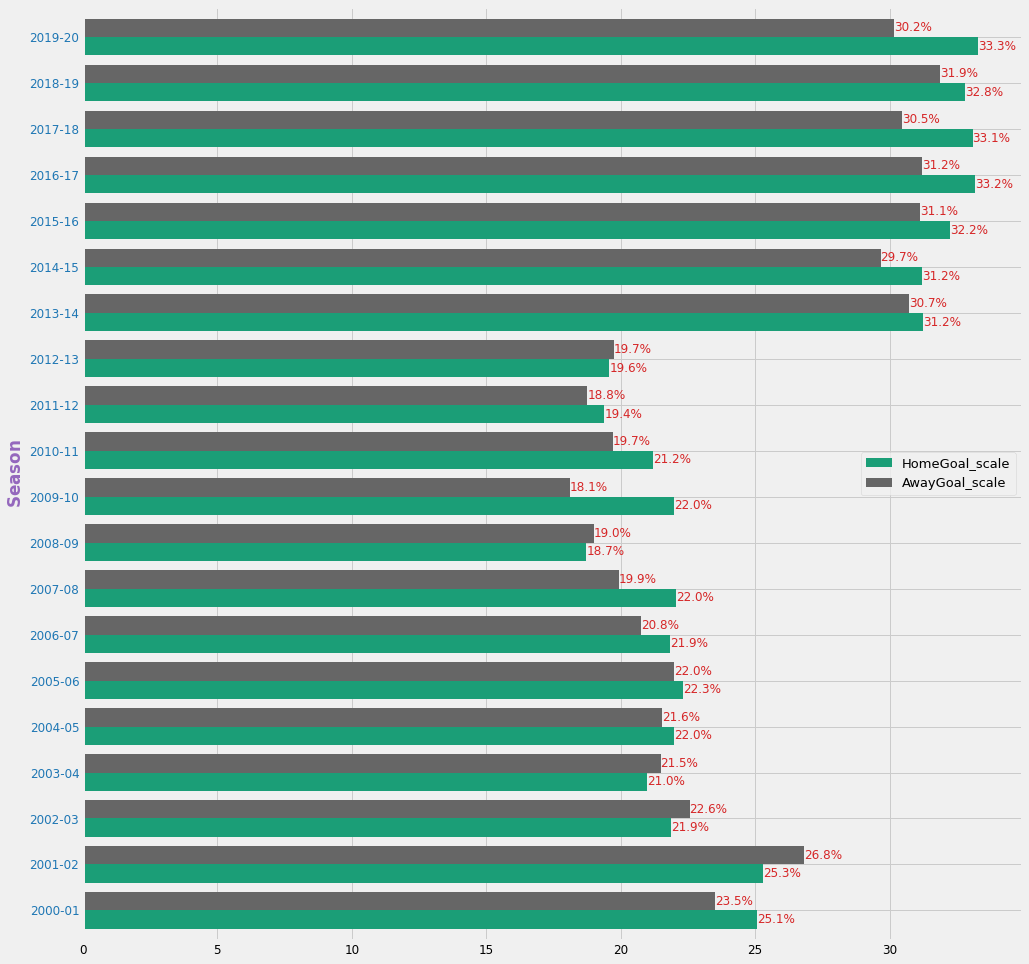

In [29]:
ax=goal_scale.plot(kind='barh',align='center',width=0.8,fontsize=12,figsize=(15,16),colormap='Dark2')
plt.yticks(color='tab:blue',fontsize=12)
plt.legend(fontsize=13,loc='right')
plt.ylabel(r"$\bf{" + str('Season') + "}$",color='tab:purple')
for p in ax.containers:
    ax.bar_label(p, fmt='%.1f%%', label_type='edge',fontsize=12,color='tab:red')


- Nhận xét C: Tỉ lệ dứt điểm thành bàn so với số lần dứt điểm chính xác của đội nhà cao hơn hầu hết các mùa giải so với đội khách 

#### D.So sánh tổng số bàn thắng của  đội nhà và đội khách  

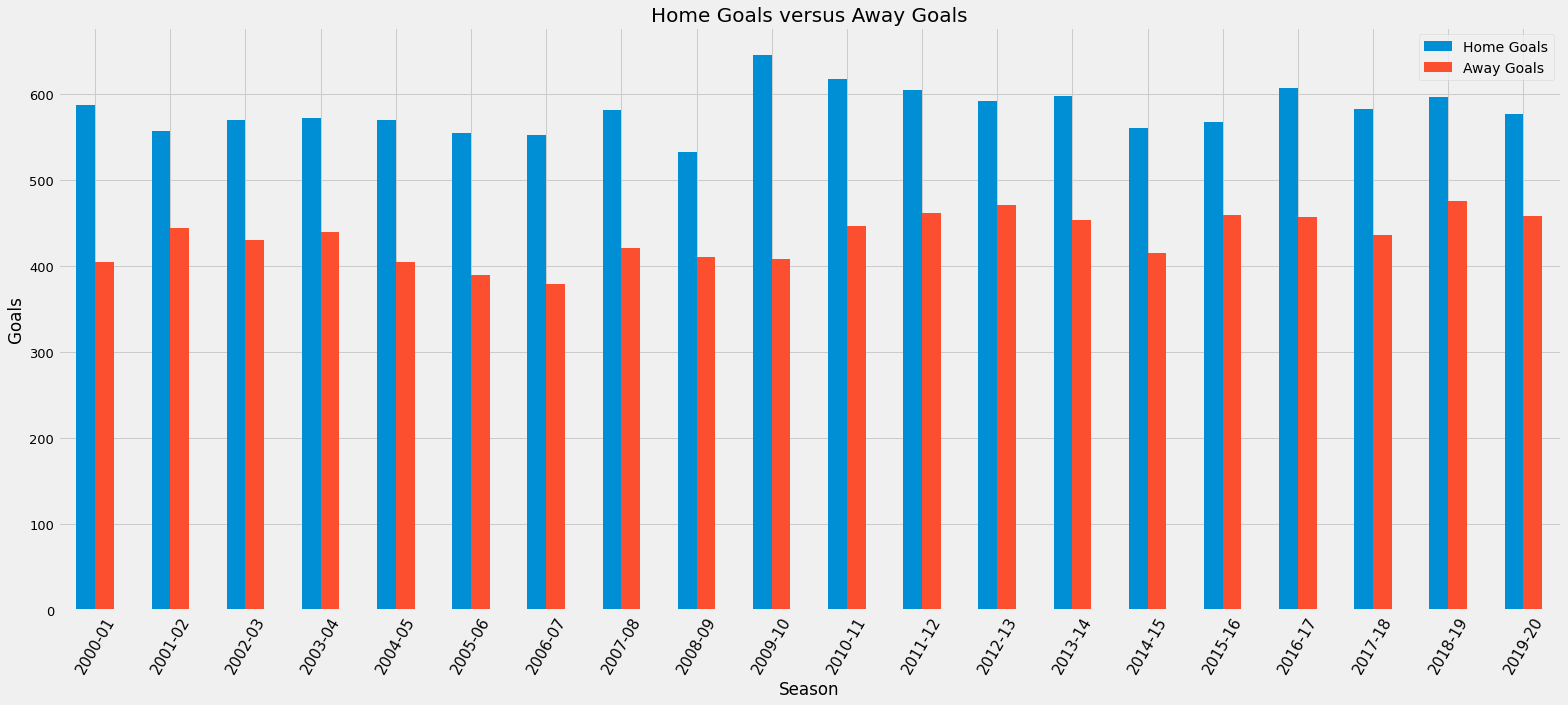

In [30]:
results_df.groupby('Season')[['FTHG','FTAG']].sum().plot(kind='bar',fontsize=13,figsize=(24,10))
plt.ylabel('Goals')

plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals versus Away Goals",fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.show()

- Nhận xét D: Số bàn của đội nhà nhiều hơn rất rõ ràng so với đội khách.

#### Từ A,B,C,D ta kết luận cho câu hỏi 1:   Yếu tố sân nhà thực sự ảnh hưởng đến tỉ lệ chiến thắng của 1 đội bóng trong một trận đấu. Các đội bóng chơi tự tin, ghi bàn rất nhiều, chuyển hoá những cũng dứt điểm chính xác thành bàn cao hơn so với đội khách.
#### Một yếu tố ngoài chuyên môn đó là khi thi đấu sân nhà các cầu thủ sự cổ động đến từ đông đảo các fans hâm mộ của đội nhà, số lượng fans thường lấn áp đội khách. Tạo cho bầu không khí trận đấu trên sân đội nhà trở nên sôi động. Ngoài ra, các đội nhà đã quen với sân, di chuyển ít hơn đội khách.

#### 2. Số lần phạm lỗi của đội nhà và đội khách như nào ở mỗi mùa giải ?

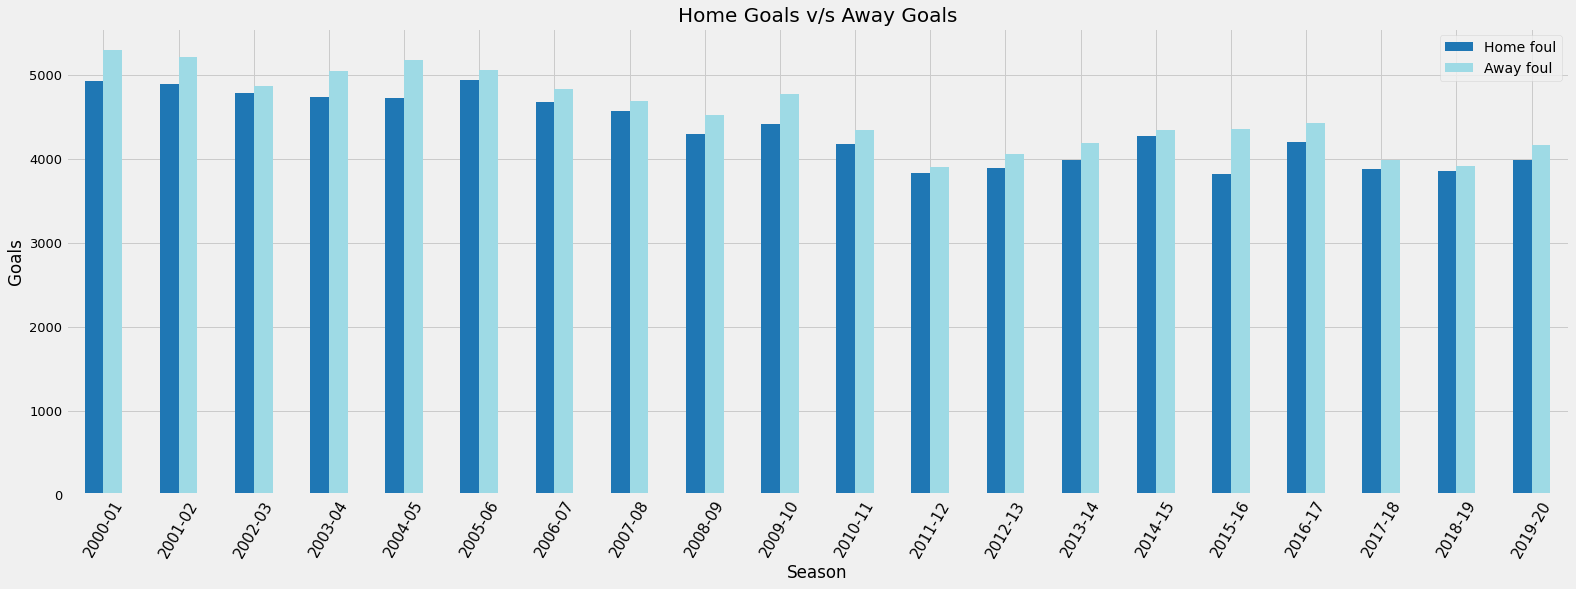

In [31]:
results_df.groupby('Season')[['HF','AF']].sum().plot(kind='bar',fontsize=13,figsize=(24,8),colormap='tab20')
plt.ylabel('Goals')
plt.legend(['Home foul','Away foul'])
plt.title("Home Goals v/s Away Goals",fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.show()

- Số lần phạm lỗi của đội khách thực sự nhiều hơn đội nhà ở tất cả 20 mùa giải đã qua. Điều này cho thấy đội khách khi thi đấu trên sân của đối thủ thực sự khá là áp lực về tâm lí.

 #### Số bàn thắng tương ứng như thế nào với số trận thắng của các đội trong mùa giải 3 mùa giải gần đây nhất ? Từ đó rút ra được điều gì ?

#### Lấy danh sách 3 mùa giải gần nhất, các cột cần thiết gồm:
- Season(Mùa giải)
- HomeTeam(Đội nhà) 
- FTR(Kết quả)
- AwayTeam(Đội khách)
- FTHG(Số bàn thắng đội nhà)
- FTAG(Số bàn thắng đội khách)

In [32]:
season_list = results_df.groupby('Season')['Season'].sum().index
season_list = season_list[-3:]

In [33]:
season = results_df[results_df['Season'].isin(season_list[-3:]) == True].reset_index(drop = True)
season_scored = season[['Season', 'HomeTeam', 'FTR', 'AwayTeam', 'FTHG', 'FTAG']]

#### Thống kê sân nhà (Gồm số trận thắng, số bàn thắng)

In [34]:
Home = season_scored.groupby(['Season', 'HomeTeam', 'FTR']).agg({'FTAG': 'count', 'FTHG': 'sum'})

Home = Home.reset_index('FTR')

Total_Home_Goal = Home['FTHG'].sum(level = ['Season','HomeTeam'])

Home = Home.rename({'FTAG':'HomeWin'}, axis = 1)
Home = Home[Home['FTR'] == 'H']
Home = Home.drop('FTHG', axis = 1)

Home = Home.join(Total_Home_Goal)
Home = Home.reset_index('HomeTeam')
Home.head(10)

C:\Users\viets\AppData\Local\Temp/ipykernel_13060/3010456857.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  Total_Home_Goal = Home['FTHG'].sum(level = ['Season','HomeTeam'])


,HomeTeam,FTR,HomeWin,FTHG
Season,,,,
2017-18,Arsenal,H,15,54
2017-18,Bournemouth,H,7,26
2017-18,Brighton,H,7,24
2017-18,Burnley,H,7,16
2017-18,Chelsea,H,11,30
2017-18,Crystal Palace,H,7,29
2017-18,Everton,H,10,28
2017-18,Huddersfield,H,6,16
2017-18,Leicester,H,7,25


#### Thống kê sân khách (Gồm số trận thắng, số bàn thắng)

In [44]:
Away = season_scored.groupby(['Season', 'AwayTeam', 'FTR']).agg({'FTHG': 'count', 'FTAG': 'sum'})
Away = Away.reset_index('FTR')

Total_Away_Goal = Away['FTAG'].sum(level = ['Season','AwayTeam'])

Away = Away.rename({'FTHG':'AwayWin'}, axis = 1)
Away = Away[Away['FTR'] == 'A']
Away = Away.drop('FTAG', axis = 1)

Away = Away.join(Total_Away_Goal)
Away = Away.reset_index('AwayTeam')
Away.head(10)

C:\Users\viets\AppData\Local\Temp/ipykernel_13060/787836344.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  Total_Away_Goal = Away['FTAG'].sum(level = 1)


,AwayTeam,FTR,AwayWin,FTAG
Season,,,,
2017-18,Arsenal,A,4,71
2017-18,Bournemouth,A,4,63
2017-18,Brighton,A,2,45
2017-18,Burnley,A,7,60
2017-18,Chelsea,A,10,95
2017-18,Crystal Palace,A,4,64
2017-18,Everton,A,3,60
2017-18,Huddersfield,A,3,24
2017-18,Leicester,A,5,90


#### Ghép kết quả từ lượt đi và lượt về tương ứng của mỗi đội

In [36]:
Summary_df = pd.concat([Home, Away], axis = 1)
Summary_df = Summary_df.reset_index()
Summary_df = Summary_df.rename({'HomeTeam':'TeamName'}, axis = 1)
Summary_df = Summary_df.drop(['FTR', 'AwayTeam'], axis = 1)

#### Tính tổng số bàn thằng, tổng số trận thắng

In [37]:
Summary_df['MatchWin'] = Summary_df['HomeWin'] + Summary_df['AwayWin']
Summary_df['FullGoals'] = Summary_df['FTHG'] + Summary_df['FTAG']

#### Biểu đồ trực quan 

In [38]:
def drawScatter(draw_df):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x = draw_df['MatchWin'], y = draw_df['FullGoals'], 
                    hue = draw_df['TeamName'], size = draw_df['FullGoals']
                    ,sizes = (50, 600))
    plt.tight_layout()

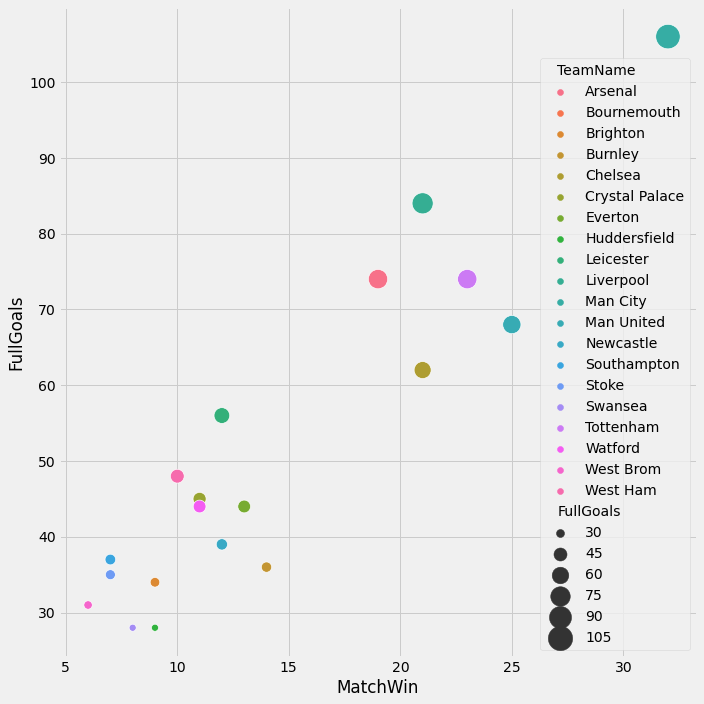

In [39]:
drawScatter(Summary_df[Summary_df['Season'] == '2017-18'])

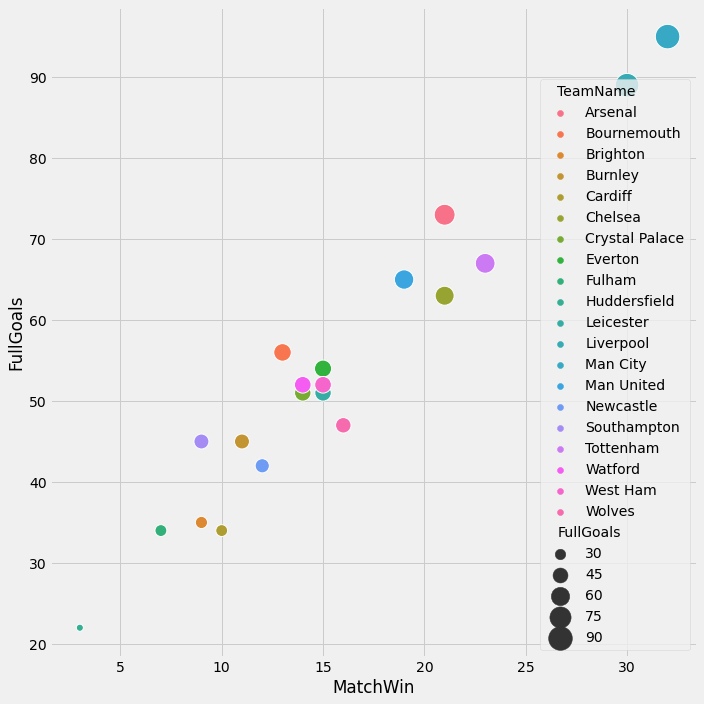

In [40]:
drawScatter(Summary_df[Summary_df['Season'] == '2018-19'])

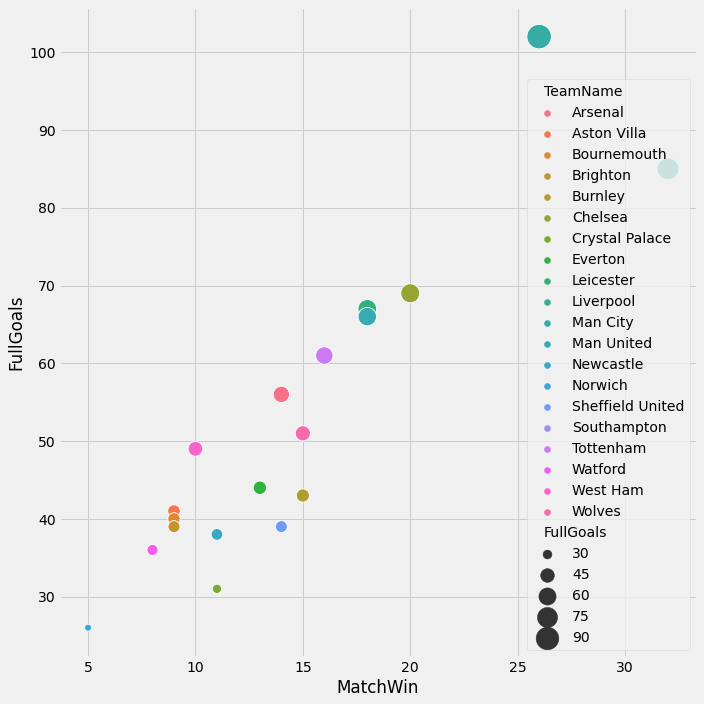

In [41]:
drawScatter(Summary_df[Summary_df['Season'] == '2019-20'])

- Cả 3 mùa giải gần đây, mối tương quan giữa số bàn thắng và số trận thắng đều tuân theo một hàm tuyến tính, bàn thắng càng nhiều thì hầu hết số lượng trận đấu chiến thắng càng lớn. Từ đây có thể áp dụng mô hình học máy để tính toán số lượng bàn thắng cần đạt được trong mùa giải tiếp theo

#### Câu hỏi 4: Những yếu tố nào giúp một đội bóng giành chức vô địch trong một mùa giải ?



# 5.Reflection

# 6. References